In [21]:
folder = "38"

In [22]:
import os
import glob

# Define the paths to the labels and images directories
labels_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/labels'
images_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/images'

# List all text files in the labels directory
label_files = glob.glob(os.path.join(labels_path, '*.txt'))

# Iterate over each file
for label_file in label_files:
    # Check if the file is empty
    if os.path.getsize(label_file) == 0:
        # File is empty, get the base name without extension
        base_name = os.path.splitext(os.path.basename(label_file))[0]

        # Construct the corresponding image file path
        image_file = os.path.join(images_path, base_name + '.jpg')

        # Delete the label file
        os.remove(label_file)
        print(f"Deleted label file: {label_file}")

        # Delete the corresponding image file if it exists
        if os.path.exists(image_file):
            os.remove(image_file)
            print(f"Deleted image file: {image_file}")

print("Cleanup complete.")


Deleted label file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/labels/38_roi_260.txt
Deleted image file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/images/38_roi_260.jpg
Deleted label file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/labels/38_roi_274.txt
Deleted image file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/images/38_roi_274.jpg
Deleted label file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/labels/38_roi_248.txt
Deleted image file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/images/38_roi_248.jpg
Deleted label file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/labels/38_roi_314.txt
Deleted image file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/images/38_roi_314.jpg
Deleted label file: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/38/labels/38_roi_300.txt
Deleted image file:

# Train Test Valid Split

In [4]:
import os
import random
import shutil

labels_source_dir = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/labels'
images_source_dir = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/images'

root = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/dataset_val"
# Destination directories
train_images_dir = f"{root}/train/images"
train_labels_dir = f"{root}/train/labels"
test_images_dir = f"{root}/test/images"
test_labels_dir = f"{root}/test/labels"
valid_images_dir = f"{root}/valid/images"
valid_labels_dir = f"{root}/valid/labels"

# Create destination directories if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)
os.makedirs(valid_images_dir, exist_ok=True)
os.makedirs(valid_labels_dir, exist_ok=True)

# List all image and label files
image_files = [f for f in os.listdir(images_source_dir) if f.endswith(".png")]
label_files = [f for f in os.listdir(labels_source_dir) if f.endswith(".txt")]

# Set the random seed for reproducibility
random.seed(42)

# Shuffle the files
random.shuffle(image_files)
random.shuffle(label_files)

# Calculate the split sizes
total_files = len(image_files)
train_size = int(0.7 * total_files)
test_size = int(0.15 * total_files)
valid_size = total_files - train_size - test_size

# Split the data
train_images = image_files[:train_size]
train_labels = [f.replace(".png", ".txt") for f in train_images]
test_images = image_files[train_size:train_size + test_size]
test_labels = [f.replace(".png", ".txt") for f in test_images]
valid_images = image_files[train_size + test_size:]
valid_labels = [f.replace(".png", ".txt") for f in valid_images]

# Copy files to destination directories
for image, label in zip(train_images, train_labels):
    shutil.copy(os.path.join(images_source_dir, image), os.path.join(train_images_dir, image))
    shutil.copy(os.path.join(labels_source_dir, label), os.path.join(train_labels_dir, label))

for image, label in zip(test_images, test_labels):
    shutil.copy(os.path.join(images_source_dir, image), os.path.join(test_images_dir, image))
    shutil.copy(os.path.join(labels_source_dir, label), os.path.join(test_labels_dir, label))

for image, label in zip(valid_images, valid_labels):
    shutil.copy(os.path.join(images_source_dir, image), os.path.join(valid_images_dir, image))
    shutil.copy(os.path.join(labels_source_dir, label), os.path.join(valid_labels_dir, label))

print("Data splitting and copying completed.")


Data splitting and copying completed.


# image for manuscript

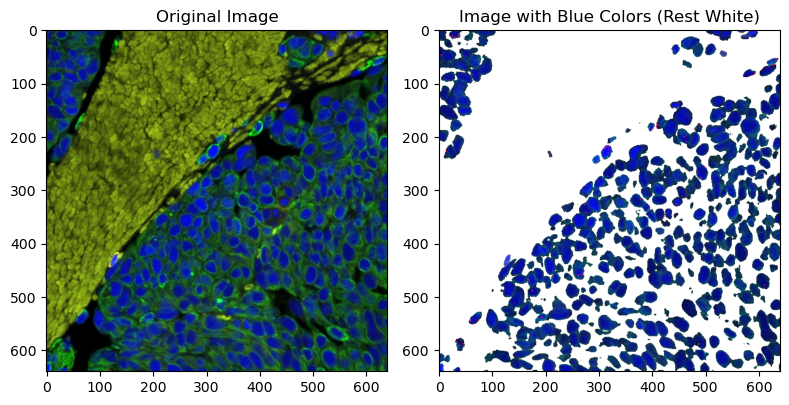

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/yshokrollahi/Desktop/MD/Project3/presentation/draft/Figures/23_roi_130.jpg'
original_image = cv2.imread(image_path)

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# Define the range for blue color in HSV
lower_blue = np.array([90, 50, 50])  # Adjust these values as needed
upper_blue = np.array([130, 255, 255])  # Adjust these values as needed

# Create a mask to extract blue colors
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Create an all-white image of the same size as the original image
white_background = np.ones_like(original_image) * 255

# Replace non-blue pixels with white in the original image
result_image = cv2.bitwise_and(original_image, original_image, mask=blue_mask) + white_background

# Show the result using Matplotlib
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(122)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Blue Colors (Rest White)")
plt.tight_layout()
plt.show()


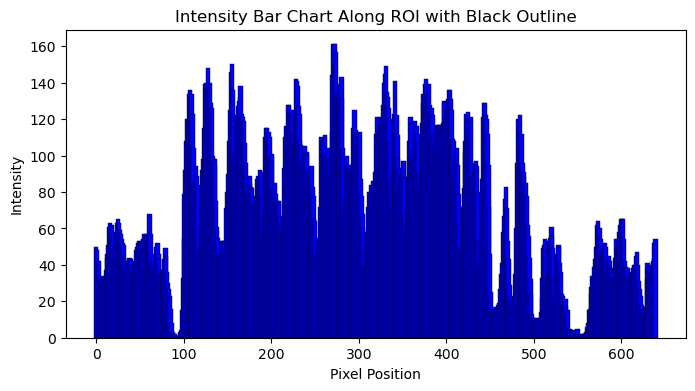

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/yshokrollahi/Desktop/MD/Project3/presentation/draft/Figures/23_roi_130.jpg'
original_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Define a line or region of interest (ROI) to profile intensity
# For example, let's create a horizontal line at y=100
roi_line = gray_image[100, :]

# Create an x-axis array representing the pixel positions
x_axis = np.arange(roi_line.shape[0])

# Set the outline color to black
outline_color = 'black'

# Plot the intensity chart as a bar chart with a black outline
plt.figure(figsize=(8, 4))
plt.bar(x_axis, roi_line, color='blue', edgecolor=outline_color, linewidth=0.3, width=5.0)
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Intensity Bar Chart Along ROI with Black Outline')
plt.grid(False)  # Remove the background grid
plt.show()


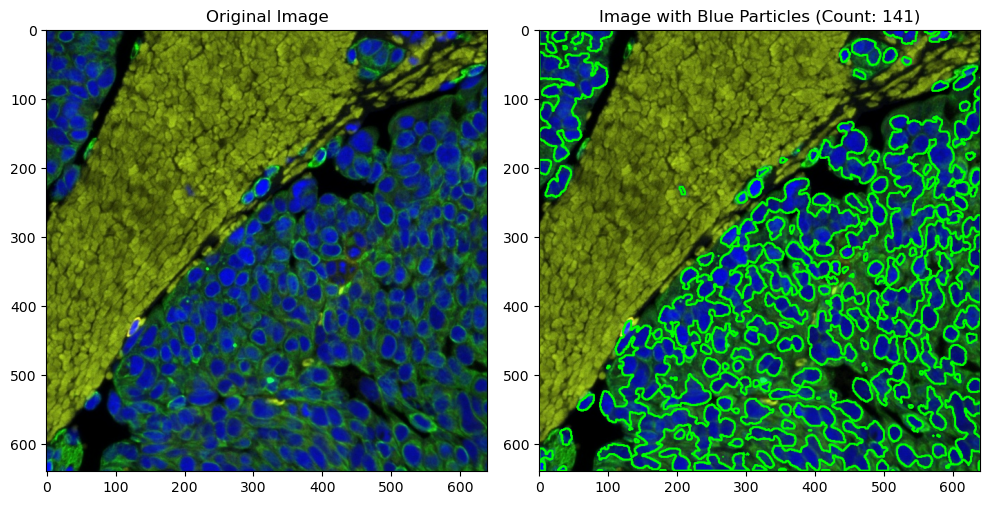

Number of blue particles: 141


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/yshokrollahi/Desktop/MD/Project3/presentation/draft/Figures/23_roi_130.jpg'
original_image = cv2.imread(image_path)

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# Define the range for blue color in HSV
lower_blue = np.array([90, 50, 50])  # Adjust these values as needed
upper_blue = np.array([130, 255, 255])  # Adjust these values as needed

# Create a mask to extract blue colors
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours in the blue mask
contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
image_with_contours = original_image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Count the number of blue particles (contours)
num_blue_particles = len(contours)

# Show the result with contours and particle count
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(122)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title(f"Image with Blue Particles (Count: {num_blue_particles})")
plt.tight_layout()
plt.show()

# Print the number of blue particles
print(f"Number of blue particles: {num_blue_particles}")


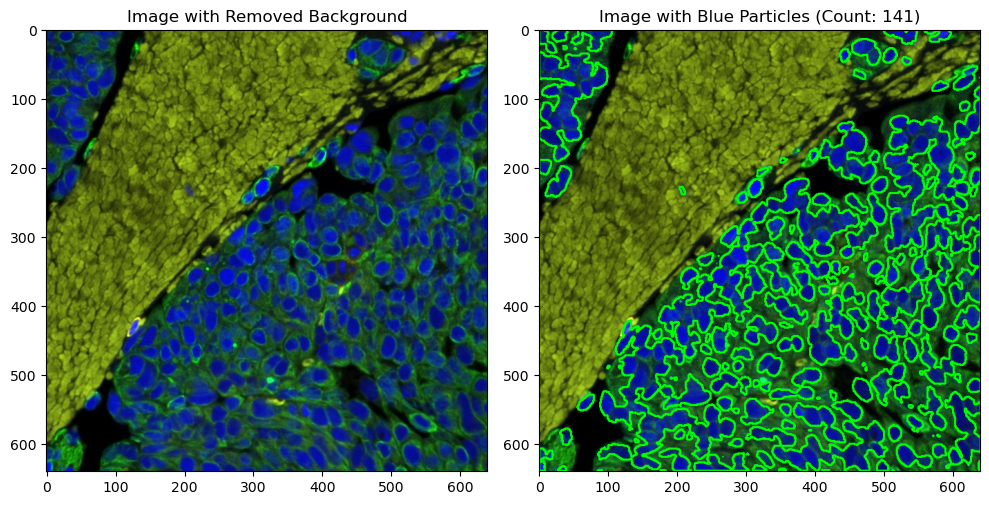

Number of blue particles: 141


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image with the background removed
image_path = '/Users/yshokrollahi/Desktop/MD/Project3/presentation/draft/Figures/23_roi_130.jpg'
image_with_removed_background = cv2.imread(image_path)

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image_with_removed_background, cv2.COLOR_BGR2HSV)

# Define the range for blue color in HSV
lower_blue = np.array([90, 50, 50])  # Adjust these values as needed
upper_blue = np.array([130, 255, 255])  # Adjust these values as needed

# Create a mask to extract blue colors
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours in the blue mask
contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the image with removed background
image_with_blue_contours = image_with_removed_background.copy()
cv2.drawContours(image_with_blue_contours, contours, -1, (0, 255, 0), 2)

# Count the number of blue particles (contours)
num_blue_particles = len(contours)

# Show the result with contours and particle count
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image_with_removed_background, cv2.COLOR_BGR2RGB))
plt.title("Image with Removed Background")
plt.subplot(122)
plt.imshow(cv2.cvtColor(image_with_blue_contours, cv2.COLOR_BGR2RGB))
plt.title(f"Image with Blue Particles (Count: {num_blue_particles})")
plt.tight_layout()
plt.show()

# Print the number of blue particles
print(f"Number of blue particles: {num_blue_particles}")


# Creating PATCH FOR VALIDATION

In [48]:
import cv2
import os

# Path to the input image
input_image_path = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/Karina/RSCC/original/MS004S1.png"

# Folder to save the patches
output_folder = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/Karina/RSCC/images"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Read the input image
image = cv2.imread(input_image_path)

# Get the dimensions of the input image
image_height, image_width, _ = image.shape

# Define the size of the patches
patch_size = 640

# Define the positions for the patches near the center of the image
center_x = (image_width - patch_size) // 2
center_y = (image_height - patch_size) // 2

positions = [
    (center_x - 2640, center_y - 2640),
    (center_x - 3280, center_y - 3280),
    (center_x - 4920, center_y - 4920)
]

for i, (x, y) in enumerate(positions):
    # Extract a patch from the image
    patch = image[y:y+patch_size, x:x+patch_size]

    # Define the output filename for the patch
    output_filename = os.path.join(output_folder, f"27_patch_{i+1}.png")

    # Save the patch to the output folder
    cv2.imwrite(output_filename, patch)

    print(f"Patch {i+1} saved as {output_filename}")


Patch 1 saved as /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/RSCC/images/27_patch_1.png
Patch 2 saved as /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/RSCC/images/27_patch_2.png
Patch 3 saved as /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/RSCC/images/27_patch_3.png


In [35]:
print(positions)

[(5673, 5876), (5773, 5976), (5873, 6076)]


In [9]:
import os

# Define the paths to the directories
labels_dir = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/dataset_nwa_four/train/labels"
images_dir = "/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/dataset_nwa_four/train/images"

# List all the txt files in the labels directory
label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

for label_file in label_files:
    label_file_path = os.path.join(labels_dir, label_file)
    
    # Count the number of lines in the txt file
    with open(label_file_path, 'r') as file:
        lines = file.readlines()
    
    if len(lines) < 300:
        # If less than 10 lines, delete the txt file
        os.remove(label_file_path)
        
        # Construct the corresponding image file path
        image_file_name = label_file.replace('.txt', '.jpg')
        image_file_path = os.path.join(images_dir, image_file_name)
        
        # Check if the corresponding image file exists and delete it
        if os.path.exists(image_file_path):
            os.remove(image_file_path)
            print(f"Deleted: {label_file_path} and {image_file_path}")
        else:
            print(f"Deleted: {label_file_path} (Corresponding image file not found)")
    else:
        pass
print("Process completed.")


Deleted: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/dataset_nwa_four/train/labels/rotated_PSCC_PATCH_1.txt (Corresponding image file not found)
Deleted: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/dataset_nwa_four/train/labels/rotated_flipped_UC_PATCH_4.txt (Corresponding image file not found)
Deleted: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/dataset_nwa_four/train/labels/flipped_UC_PATCH_4.txt (Corresponding image file not found)
Deleted: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/dataset_nwa_four/train/labels/PSCC_PATCH_1.txt (Corresponding image file not found)
Deleted: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/dataset_nwa_four/train/labels/rotated_flipped_PSCC_PATCH_1.txt (Corresponding image file not found)
Deleted: /Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/dataset_nwa_four/train/labels/flipped_vertically_flipped_UC_PATCH_4.txt (Corresponding image file 